In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
data = pd.read_csv(r"F:\Downloads New\The Sparks Foundation\Global Terrorism - START data\globalterrorismdb.csv" , low_memory = False)

## 1. Understanding the data.

In [21]:
data.shape

(181691, 135)

In [22]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data.nunique()

eventid         576
iyear            47
imonth           13
iday             32
approxdate     2244
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related       14306
Length: 135, dtype: int64

In [8]:
data['approxdate'].nunique()

2244

## 2. Cleaning the data.

In [9]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

## 3. Removing the null values.

In [10]:
globalterrorismdb = data.drop(['eventid' , 'iyear' , 'imonth' , 'iday'], axis = 1)

In [11]:
globalterrorismdb.head()

,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
corelation = globalterrorismdb.corr()

## 4. US Terror Attacks and Death Injuries.

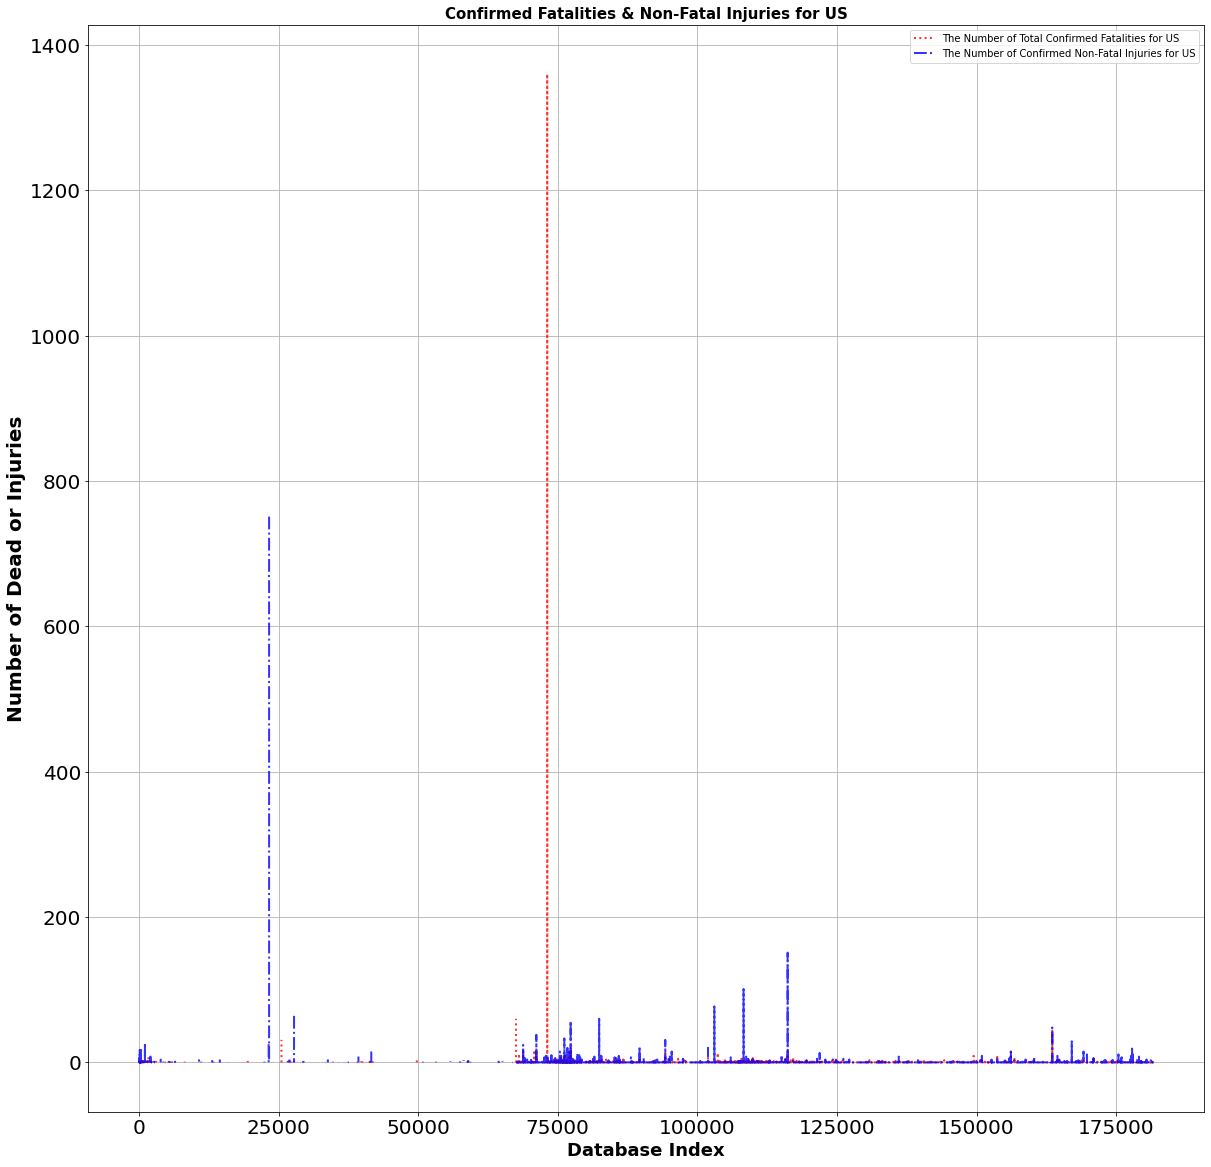

In [13]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=20)
data.nwoundus.plot(color = "blue", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=20)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=18, weight = 'bold')              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=20, weight= 'bold')

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US' , fontsize = 15 , weight = 'bold')            #plot title
plt.show()

##### Given that the data is sorted by dates, attacks on US citizens seem to be very rare in a given date range. But the terrorist act against the citizens of US has been increasingly in the following year after this rare date range.

## 5. Japan Terror Attack and Death Injuries.

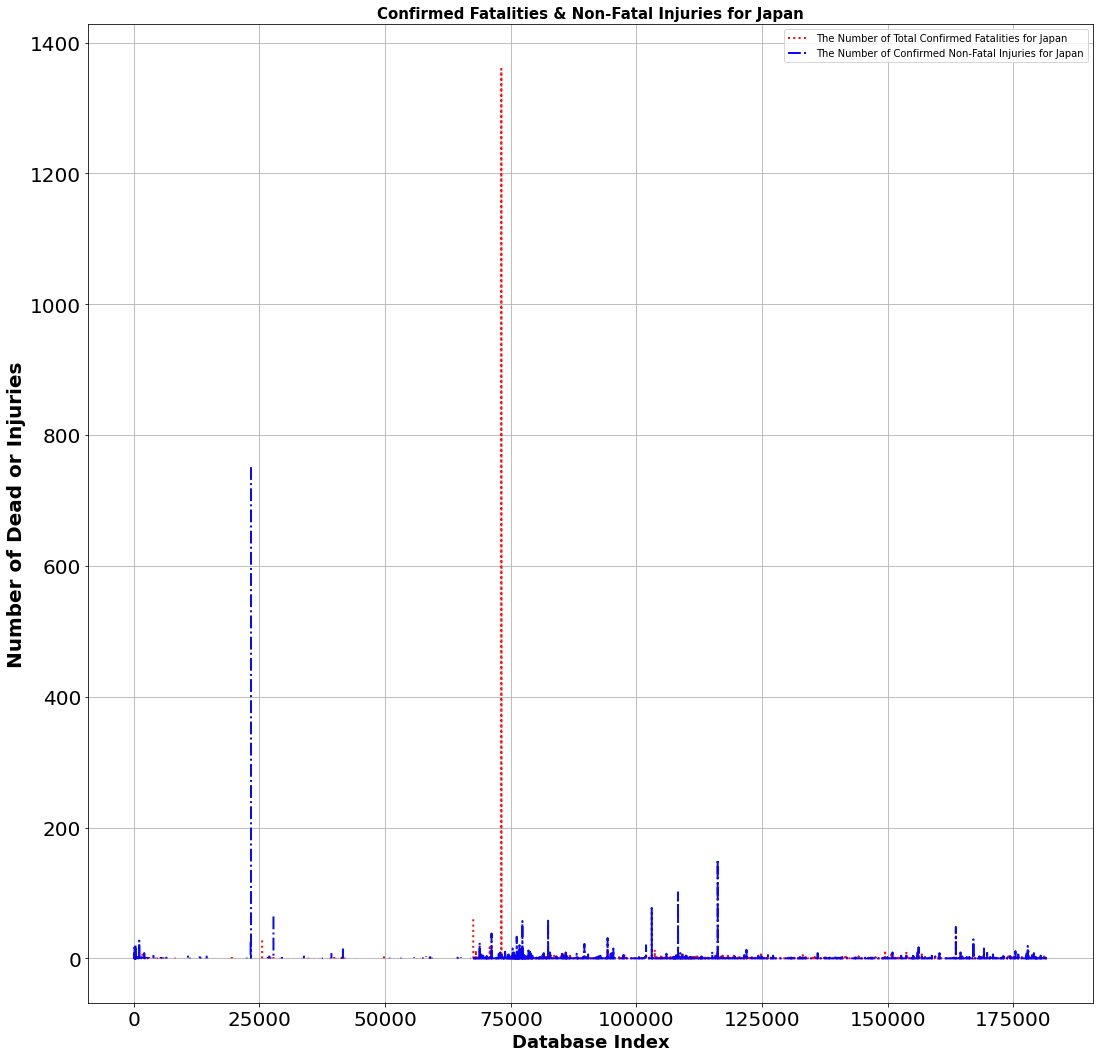

In [14]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for Japan', linewidth = 2, alpha = 10.0, grid = True, 
                 linestyle = ':', figsize = (18,18), fontsize=20)
data.nwoundus.plot(color = "blue", label = 'The Number of Confirmed Non-Fatal Injuries for Japan', linewidth = 2, alpha = 10.0, grid = True, 
                 linestyle = '-.', figsize = (18,18), fontsize=20)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=18, weight = 'bold')              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=20, weight= 'bold')

plt.title('Confirmed Fatalities & Non-Fatal Injuries for Japan' , fontsize = 15 , weight = 'bold')            #plot title
plt.show()

## 6. Death and Injuries at all time.

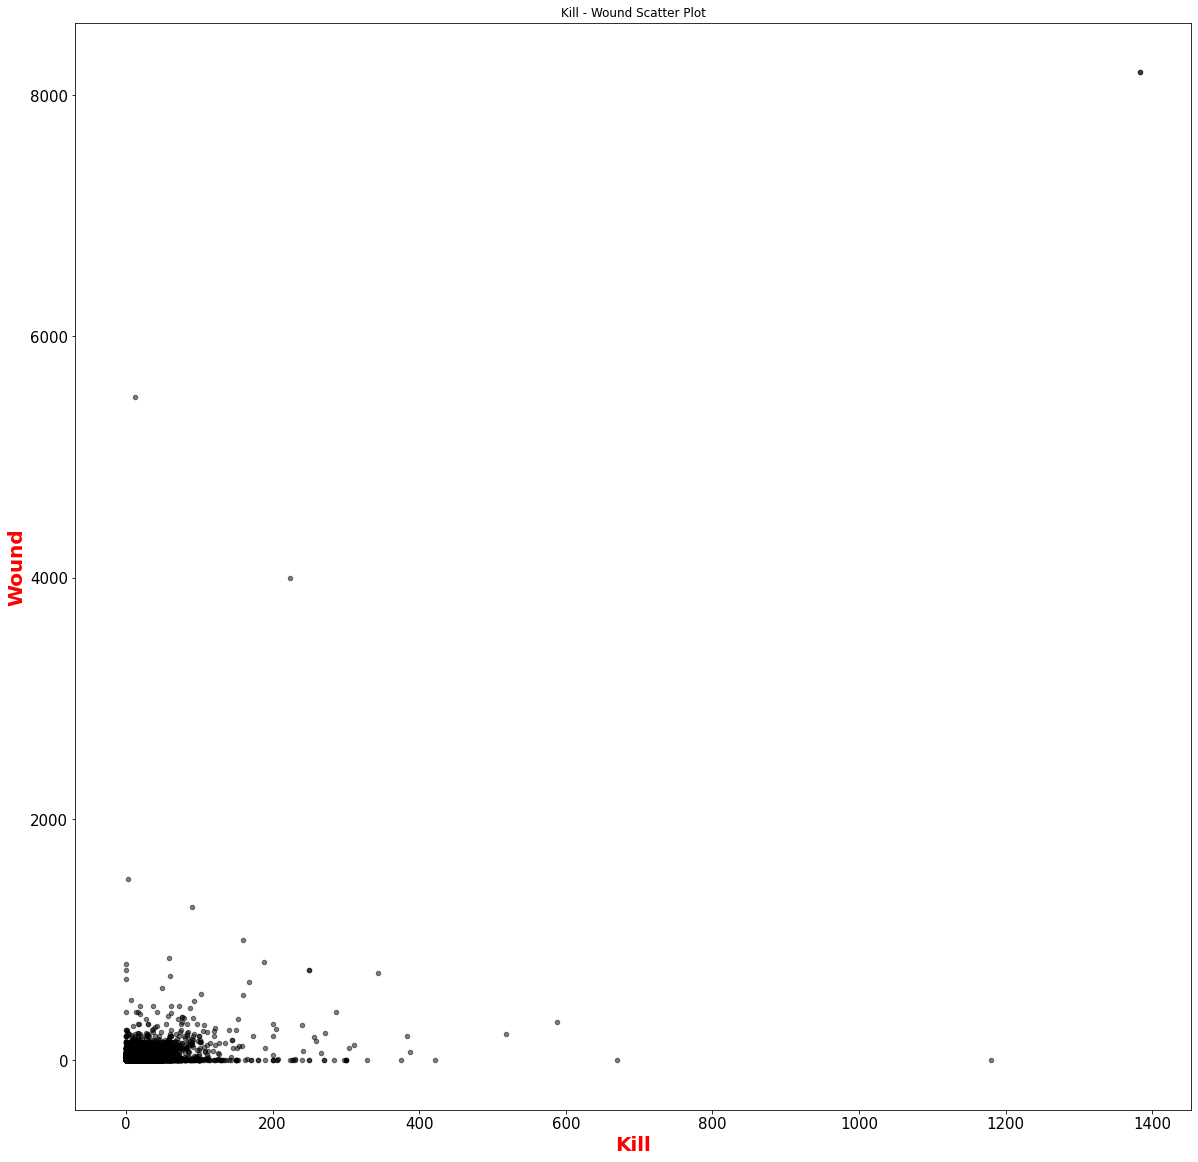

In [60]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'black', figsize = (20,20), fontsize = 15)
plt.xlabel('Kill', fontsize = 20, color = 'red', weight = 'bold')
plt.ylabel('Wound', fontsize=20 , color = 'red' , weight = 'bold')
plt.title('Kill - Wound Scatter Plot')
plt.show()

### 7. Frequency of Terrorist Actions in Customized Region

### 7(i). Let's Analyze in Middle East and North Africa.

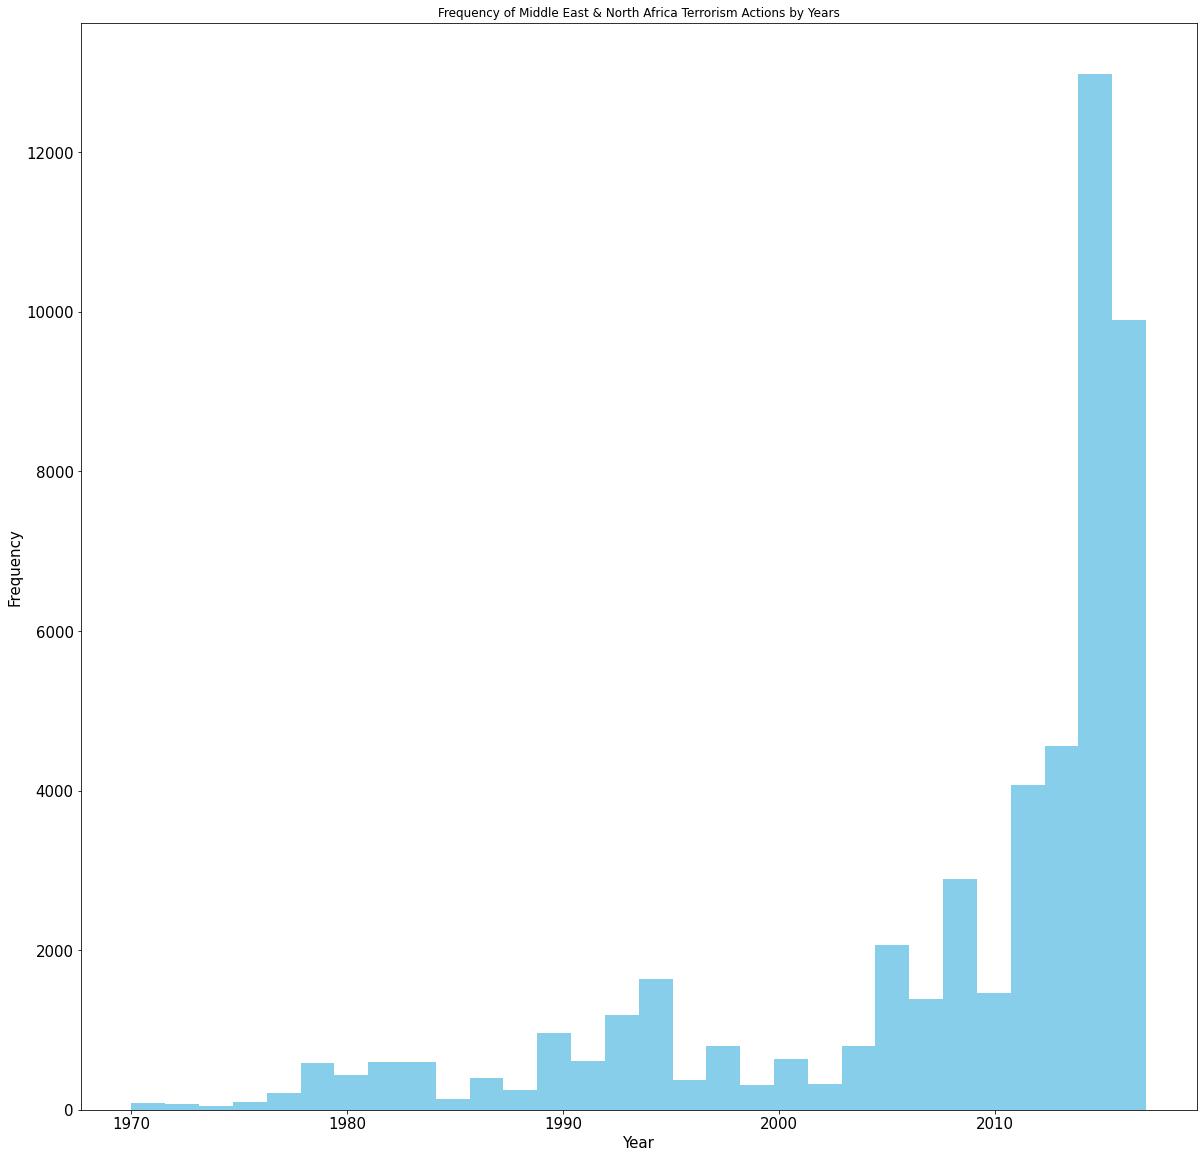

In [16]:
middleEastData = data[data['region']==10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'skyblue', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency', fontsize = 15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

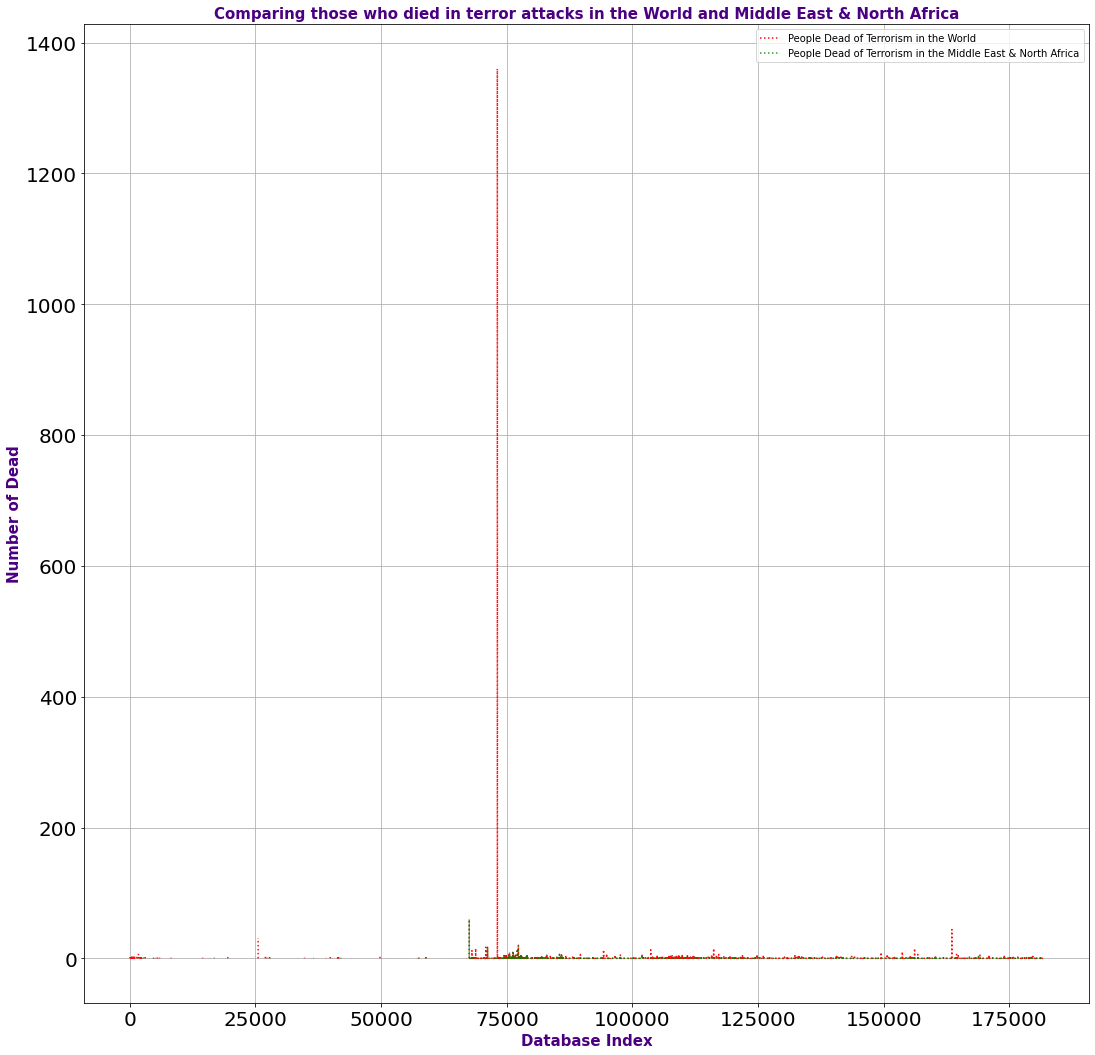

In [63]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 10.0, grid = True, 
                 linestyle = ':', figsize = (18,18), fontsize=20)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = ':', figsize = (18,18), fontsize=20) #dotted line type style use.

plt.legend(loc='upper right') ##legend,puts label into plot
plt.xlabel('Database Index', fontsize=15, weight = 'bold' , color = 'indigo')  ## label = name of label
plt.ylabel('Number of Dead', fontsize=15, weight = 'bold', color = 'indigo')

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa' , color = 'indigo', fontsize = 15, weight = 'bold') 
plt.show()

## 8. Terrorist Attacks of a Particular year and their locations.

### 8(i). Terrorist attacks activity in the world over a certain time of years.

In [18]:
filterYear = data['iyear'] == 1970

In [19]:
filterData = data[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [23]:

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

## Above 80% of terrorist attack in 1970 were carried out on the American continent. In the year of 1970, the North Africa and Middle East were the center of terrorist attack, faced only one attack.

### 9. Find the total number of people die during terror attack.

In [25]:
killData = data.loc[:,'nkill']
print('Number of people killed in terror attack:', int(sum(killData.dropna())))

Number of people killed in terror attack: 411868


### 10. Number of people killed in terror attack "411868"

### 11. Find the type of attack where people died.

In [27]:
attackData = data.loc[:,'attacktype1':'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [28]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [30]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


## 12. People killed by Terrorist Attack in different Countries.

In [35]:
countryData = data.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [36]:

countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [37]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


In [38]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

# 13. Country by Country Analysis.

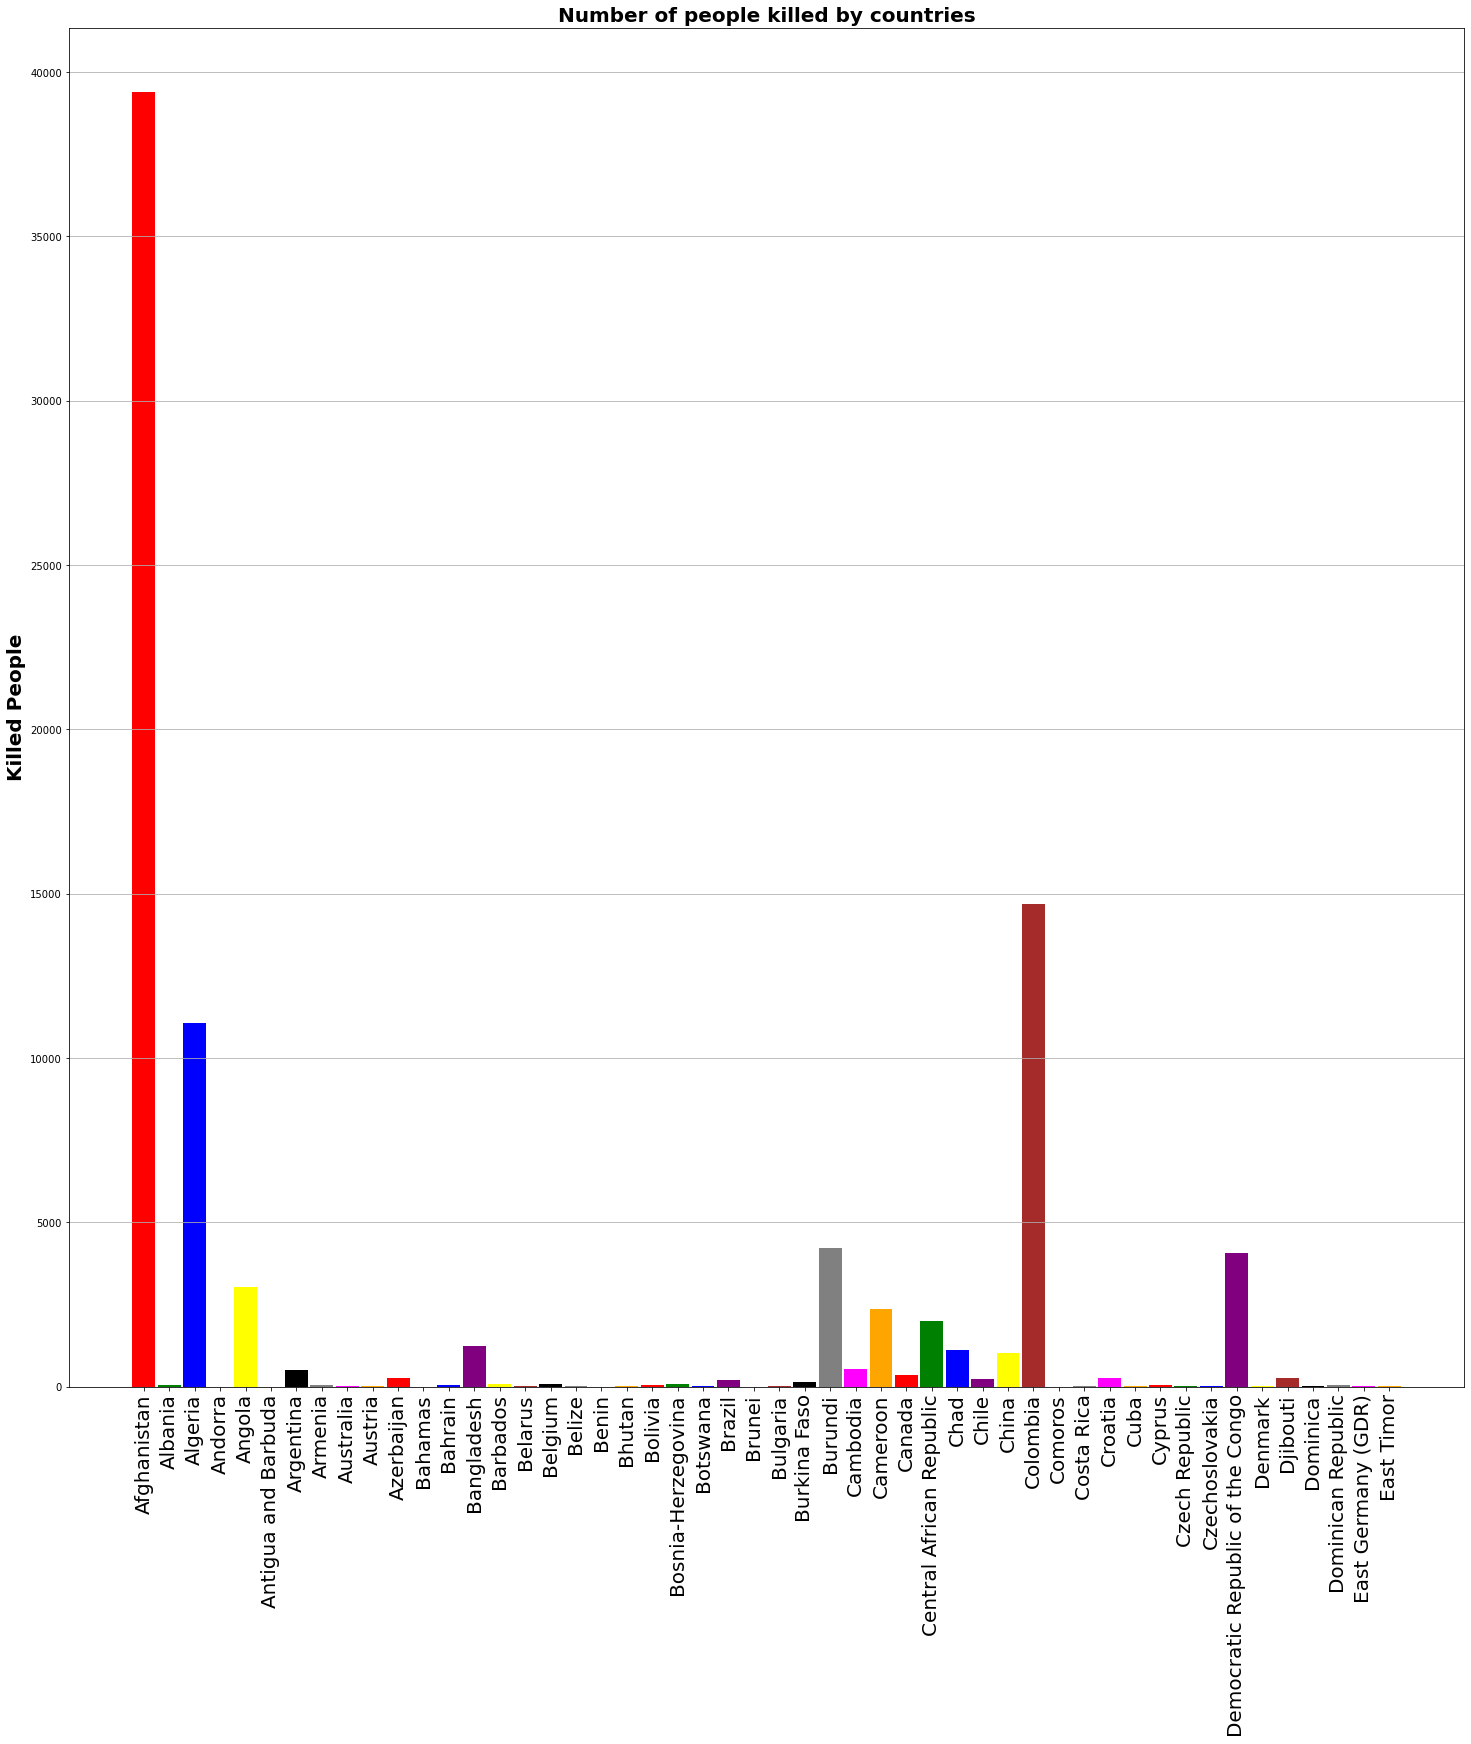

In [52]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] ## color list for Countries 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20, color = 'black', weight = 'bold')
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of people killed by countries', fontsize =20, color = 'black', weight = 'bold')
# print(fig_size)
plt.show()

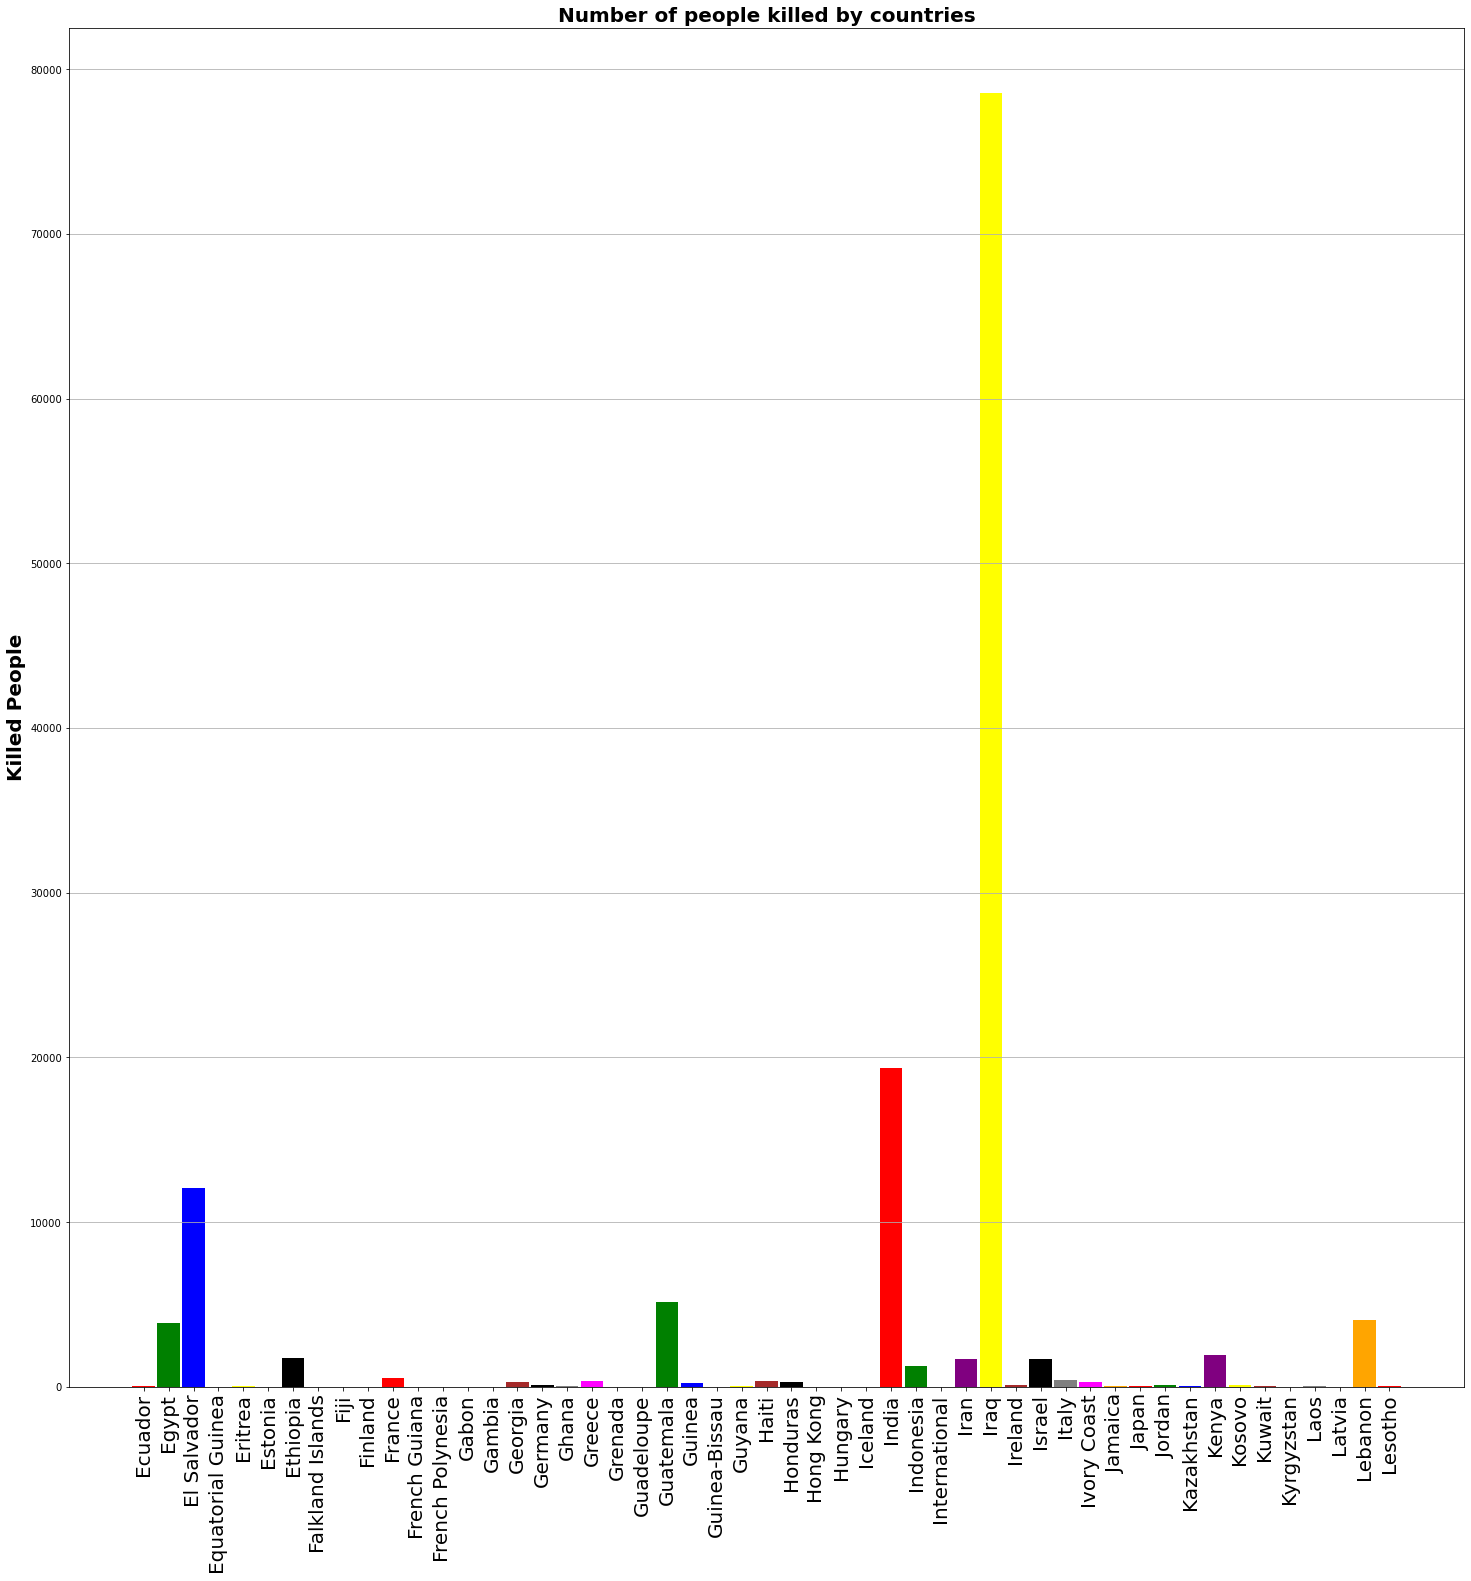

In [56]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] #Color list of countries
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20, color = 'black', weight = 'bold')
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20, color = 'black' , weight = 'bold')
plt.show()

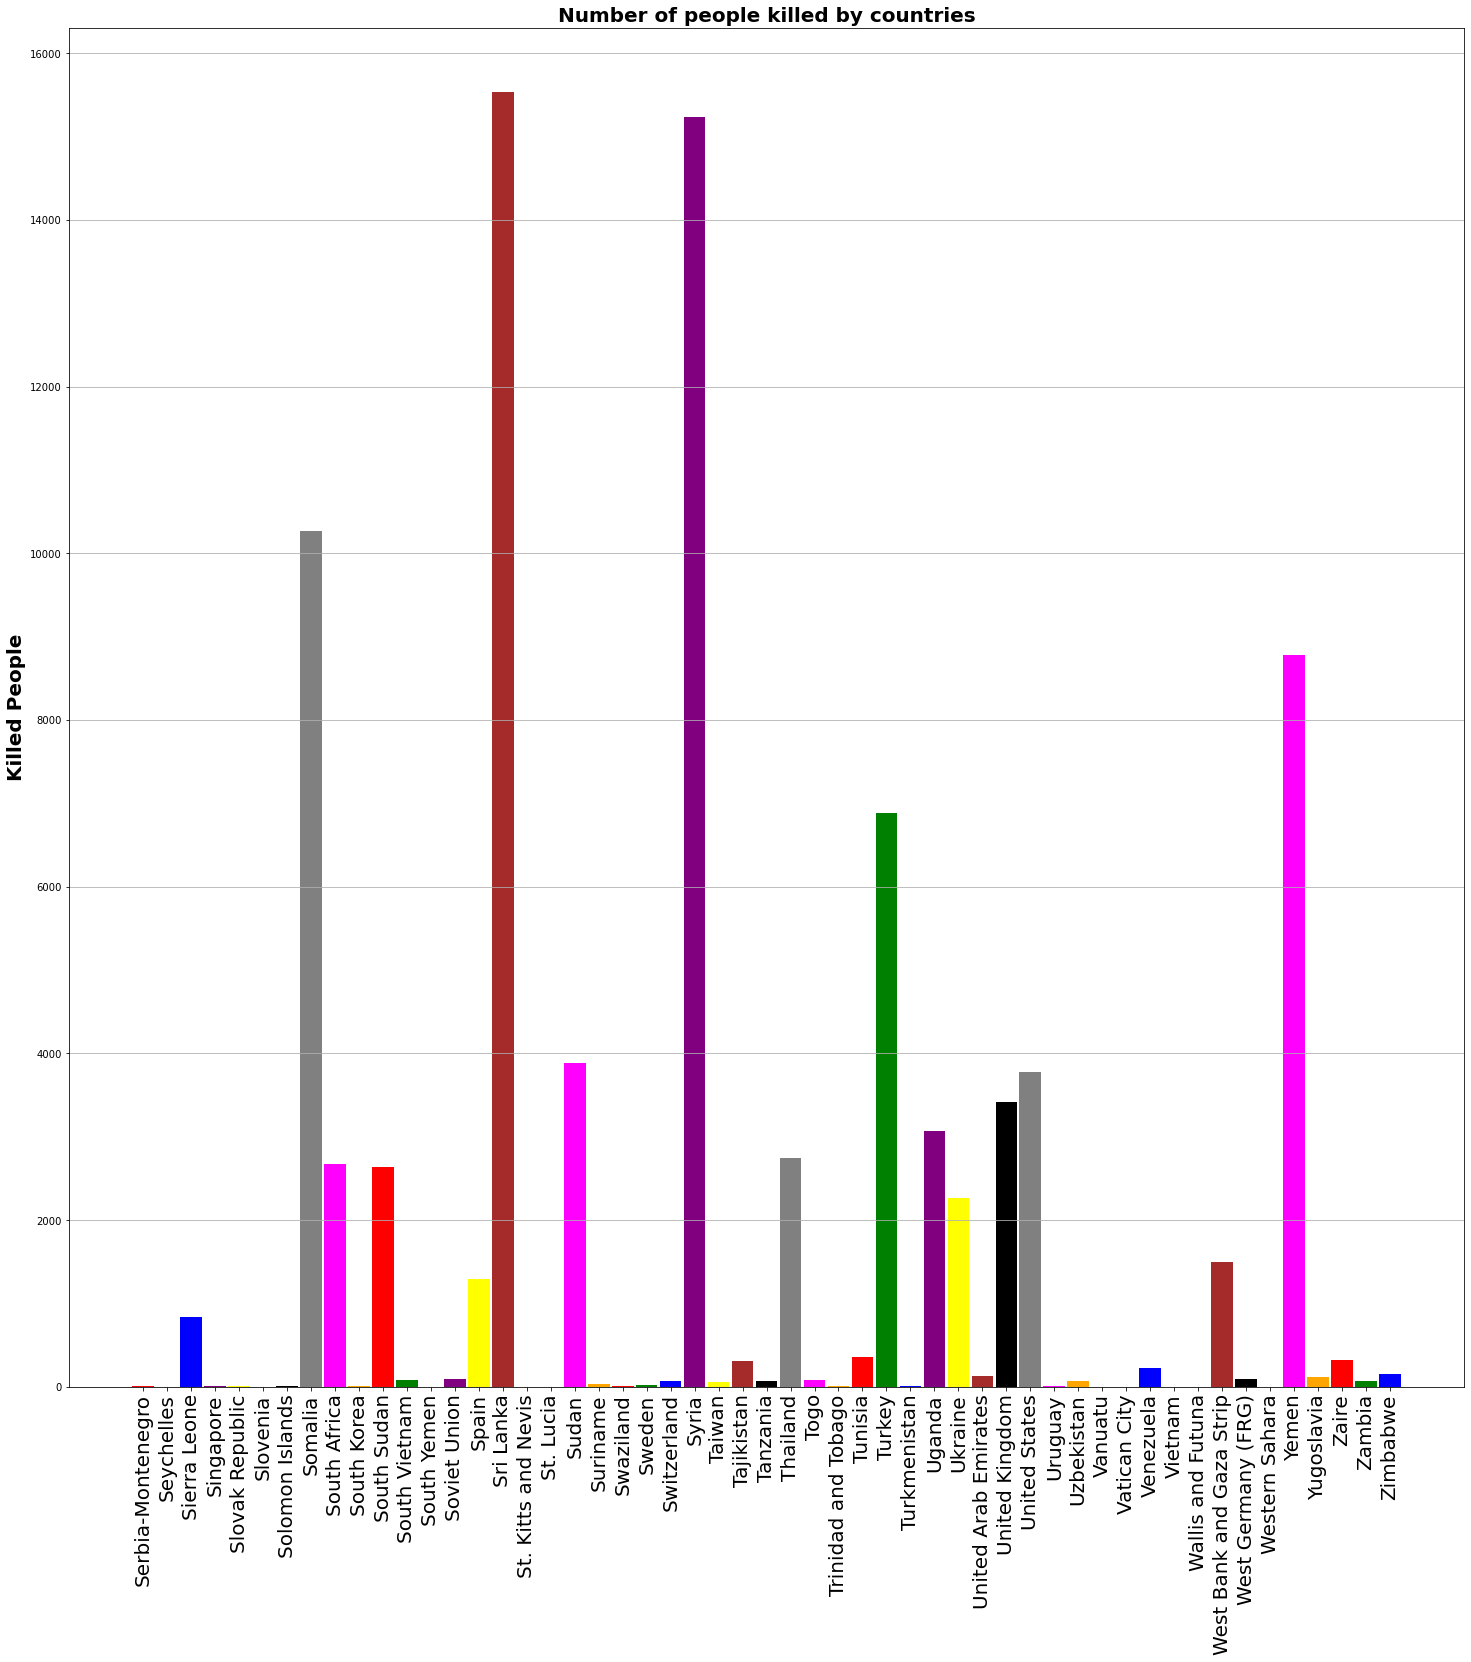

In [59]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] #Color list of countries
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20 , color = 'black' , weight = 'bold')
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of people killed by countries' , fontsize = 20, color = 'black', weight = 'bold')
plt.show()

### NOTE:  There are the different country datasets that are affected by terrorist attack, most of the country are the Muslim country that are more affected by the other countries. If you look at the graphs Pakistan, Iraq, Syria, Afghanistan are the most damaged countries in above all.